<a href="https://colab.research.google.com/github/itsap159/hello-world/blob/master/dsc210_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the required modules
import pandas as pd
import numpy as np
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import NMF
from sklearn.preprocessing import normalize
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('omw-1.4')
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
!pip install -U gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from gensim.models.nmf import Nmf
from operator import itemgetter
import matplotlib.pyplot as plt 
import resource
import tracemalloc
import sys

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amanparikh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amanparikh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/amanparikh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/amanparikh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
#importing the dataset
news_data = pd.read_csv('news.csv')
news_data.head(5)

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
#Getting the headlines
headlines = news_data[['headline_text']]
headlines = headlines.astype('str')
print(headlines['headline_text'])
headlines.head(5)

0          aba decides against community broadcasting lic...
1             act fire witnesses must be aware of defamation
2             a g calls for infrastructure protection summit
3                   air nz staff in aust strike for pay rise
4              air nz strike to affect australian travellers
                                 ...                        
1244179    two aged care residents die as state records 2...
1244180    victoria records 5;919 new cases and seven deaths
1244181      wa delays adopting new close contact definition
1244182    western ringtail possums found badly dehydrate...
1244183    what makes you a close covid contact here are ...
Name: headline_text, Length: 1244184, dtype: object


,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
#Tokenizing
def tokenize_words(txt):
  tokenized= word_tokenize(txt)
  return tokenized

In [ ]:
#To remove stopwords in text
def remove_stopwords(tokenized_txt):
  cleaned_text_array = [word for word in tokenized_txt if word not in stop_words]
  return cleaned_text_array

In [ ]:
#Lammetizing
def word_lemmatizer(tokenized_text_without_stopwords):
  wordnet_lemmatizer = WordNetLemmatizer()
  lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in tokenized_text_without_stopwords]
  return ' '.join(lemmatized)

In [ ]:
#Applying preprocessing
stop_words = stopwords.words('english')
headlines['headline_tokenized_text']=headlines['headline_text'].apply(tokenize_words)
headlines['processed_headlines'] = headlines['headline_tokenized_text'].apply(lambda x: remove_stopwords(x))

headlines['final_processed'] = headlines['processed_headlines'].apply(lambda x: word_lemmatizer(x))


In [ ]:
headlines.head(5)

,headline_text,headline_tokenized_text,processed_headlines,final_processed
0,aba decides against community broadcasting lic...,"[aba, decides, against, community, broadcastin...","[aba, decides, community, broadcasting, licence]",aba decides community broadcasting licence
1,act fire witnesses must be aware of defamation,"[act, fire, witnesses, must, be, aware, of, de...","[act, fire, witnesses, must, aware, defamation]",act fire witness must aware defamation
2,a g calls for infrastructure protection summit,"[a, g, calls, for, infrastructure, protection,...","[g, calls, infrastructure, protection, summit]",g call infrastructure protection summit
3,air nz staff in aust strike for pay rise,"[air, nz, staff, in, aust, strike, for, pay, r...","[air, nz, staff, aust, strike, pay, rise]",air nz staff aust strike pay rise
4,air nz strike to affect australian travellers,"[air, nz, strike, to, affect, australian, trav...","[air, nz, strike, affect, australian, travellers]",air nz strike affect australian traveller


In [ ]:
training_headlines = headlines['final_processed']

In [ ]:
#Sklearn count vectorizer function to get the design matrix
vectorizer = CountVectorizer(analyzer='word', max_features=5000)
x_counts = vectorizer.fit_transform(training_headlines)

In [ ]:
#Applyinf TFIDF transformer on the counts
transformer = TfidfTransformer(smooth_idf=False)
x_tfidf = transformer.fit_transform(x_counts)

In [ ]:
#Normalizing the tfidf values
xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)

In [ ]:
#obtain a NMF model.
num_topics = 8
model = NMF(num_topics);
#fit the model
model.fit(xtfidf_norm)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


NMF(n_components=8)

In [ ]:
#To get and print the corresponding words and topics
def get_nmf_topics(model, n_top_words):
    
    feat_names = vectorizer.get_feature_names()
    
    word_dict = {};
    for i in range(num_topics):
        words_ids = model.components_[i].argsort()[:-20 - 1:-1]
        words = [feat_names[key] for key in words_ids]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = words;
    
    return pd.DataFrame(word_dict)

In [ ]:
get_nmf_topics(model, 20)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08
0,interview,man,say,abc,police,fire,rural,new
1,extended,charged,win,weather,probe,house,national,zealand
2,michael,murder,council,sport,investigate,home,news,year
3,david,court,australia,entertainment,death,crew,nsw,law
4,james,dy,call,business,search,damage,qld,case
5,ben,crash,plan,news,missing,warning,sa,get
6,john,woman,back,market,officer,suspicious,reporter,hospital
7,andrew,face,water,analysis,car,threat,closer,home
8,matt,death,govt,speaks,crash,destroys,park,open
9,nrl,accused,australian,talk,hunt,blaze,nrn,record


Text(0.5, 1.0, 'Top 100 words in Headlines Data')

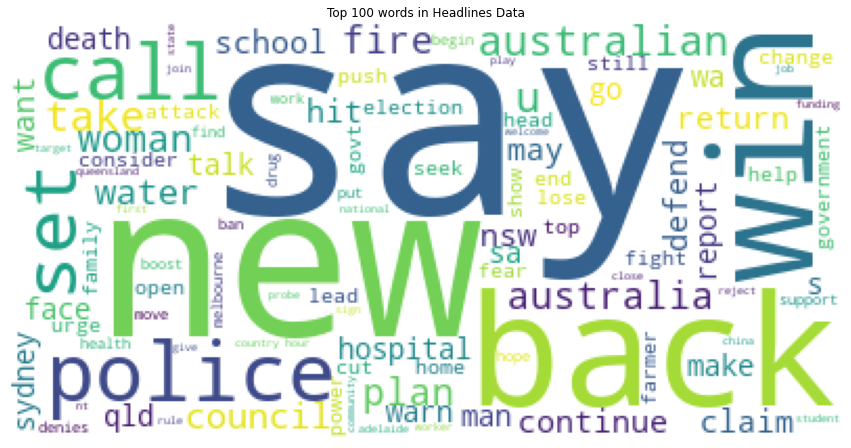

In [ ]:
# Wordcloud to represent the top 100 words in the data
from wordcloud import WordCloud as wc
import matplotlib.pyplot as plt
fig,axs = plt.subplots(1,figsize=(15,15))
axs.imshow(wc(background_color='white',max_words=100).generate(''.join(headlines.final_processed.tolist())))
axs.axis('off')
axs.set_title('Top 100 words in Headlines Data')

0.3326054354487043
0.40607125517455467
0.44101691305819674
0.468159478087518
0.48534899924406955
0.5042504524030401
0.5108294836139526
0.5189561050932288
0.5247696701365442
[(50, 0.33261), (100, 0.40607), (150, 0.44102), (200, 0.46816), (250, 0.48535), (300, 0.50425), (350, 0.51083), (400, 0.51896), (450, 0.52477)]


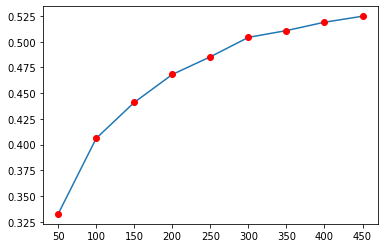


 The Best number of topics for maximum coherence score -  450


In [ ]:
processed_texts = headlines['final_processed'].apply(lambda x : x.split(' '))
# Create hashmap between words and integer ids
dictionary = Dictionary(processed_texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(no_below=3,
                          no_above=0.9,
                          keep_n=5000)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in processed_texts]

# Create a list of the topic numbers we want to try in increasing order
topic_numbers = list(np.arange(50, 500, 50))

# Running the nmf model and to get the coherence score for each number of topics
coherence_scores = []
usertime=[]
memory=[]
for nums in topic_numbers:
    tracemalloc.start()
    nmf = Nmf(
        corpus=corpus,
        num_topics=nums,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    usage=resource.getrusage(resource.RUSAGE_SELF)
    usertime.append(usage[1])
    memory.append(tracemalloc.get_traced_memory()[0] )
    tracemalloc.stop()
    
    coherence_model = CoherenceModel(
            model=nmf,
            texts=processed_texts,
            dictionary=dictionary,
            coherence='c_v'
        )
    print(coherence_model.get_coherence())
        
    coherence_scores.append(round(coherence_model.get_coherence(), 5))
  
# Get the number of topics with the coherence score
coherence_scores_tup = list(zip(topic_numbers, coherence_scores))
best_topics_number = sorted(coherence_scores_tup, key=itemgetter(1), reverse=True)[0][0]

print(coherence_scores_tup)
x_val = [x[0] for x in coherence_scores_tup]
y_val = [x[1] for x in coherence_scores_tup]

plt.plot(x_val,y_val)
plt.plot(x_val,y_val,'or')
plt.show()

print("\n The Best number of topics for maximum coherence score - ",best_topics_number)

In [ ]:
import resource
from resource import *
def using(point=""):
    usage=resource.getrusage(RUSAGE_SELF)
    print(usage)
    return '''%s: usertime=%s systime=%s mem=%s mb
           '''%(point,usage[0],usage[1],
                usage[2]/1024.0 )

In [ ]:
import gc
import sys
gc.collect()

print(using("before"))
wrk = ["wasting mem"] * 1000000
print(using("after"))

resource.struct_rusage(ru_utime=9664.852033, ru_stime=1180.179827, ru_maxrss=1982943232, ru_ixrss=0, ru_idrss=0, ru_isrss=0, ru_minflt=13512508, ru_majflt=4160, ru_nswap=0, ru_inblock=0, ru_oublock=0, ru_msgsnd=977, ru_msgrcv=781, ru_nsignals=0, ru_nvcsw=13460, ru_nivcsw=83090435)
before: usertime=9664.852033 systime=1180.179827 mem=1936468.0 mb
           
resource.struct_rusage(ru_utime=9664.853221, ru_stime=1180.181953, ru_maxrss=1982943232, ru_ixrss=0, ru_idrss=0, ru_isrss=0, ru_minflt=13514507, ru_majflt=4160, ru_nswap=0, ru_inblock=0, ru_oublock=0, ru_msgsnd=981, ru_msgrcv=784, ru_nsignals=0, ru_nvcsw=13460, ru_nivcsw=83090464)
after: usertime=9664.853221 systime=1180.181953 mem=1936468.0 mb
           


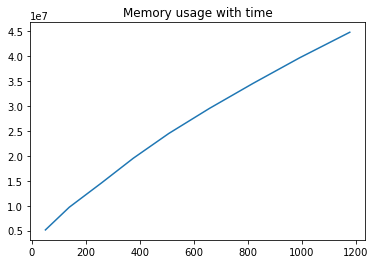

In [ ]:
from matplotlib import pyplot as plt1

plt1.title("Memory usage with time")
# Plot values using x,y coordinates:
plt1.plot(usertime,memory)
plt1.show()